<h2>Shelter Animal Outcomes</h2>
<p>Below is a work with a dataset from Kaggle.com, it is the data of shelter animals and the aim is to predict the outcome of new animals that come to the shelter. Possible outcomes are: return to owner, euthanasia, adoption, transfer and death</p>

In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

df_train = pd.read_csv('ShelterTrain.csv',sep=',')

In [2]:
df_test = pd.read_csv('ShelterTest.csv',sep=',')
df_test[:5]

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [3]:
df_train[:5]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


<h2>Counting of the features and checking how they compare with possible values </h2>

<h3>Animal Type</h3>

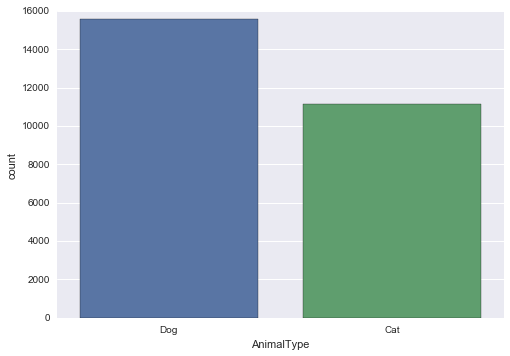

In [4]:
sns.countplot(df_train.AnimalType)

<h3>Outcome Type</h3>

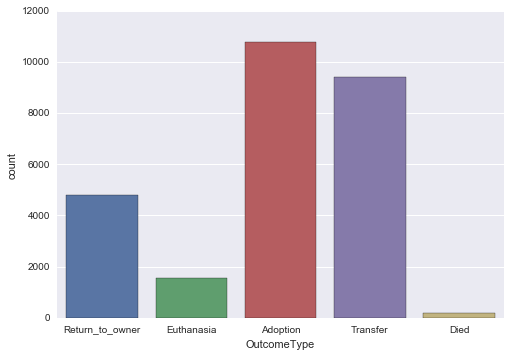

In [5]:
sns.countplot(df_train.OutcomeType)

<h3>Ageupon Outcome</h3></br><h4>Check the values for Ageupon Outcome and figure out a way to categorize it better</h4>

In [6]:
df_train.AgeuponOutcome.value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
7 months      288
9 years       288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
4 days         50
6 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

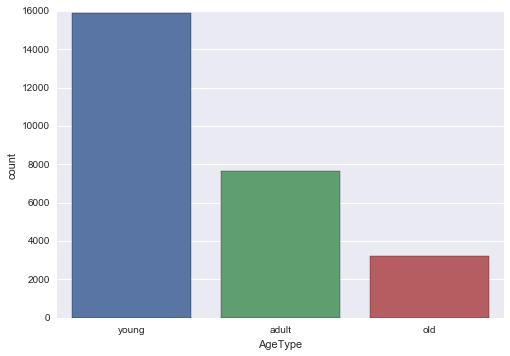

In [7]:
def get_age(x):
    x = str(x)
    if x.find('days') >= 0: return int(x.replace(" days", ""))
    if x.find('day') >= 0: return int(x.replace(" day", ""))
    if x.find('weeks') >= 0: return int(x.replace(" weeks", ""))*7
    if x.find('week') >= 0: return int(x.replace(" week", ""))*7
    if x.find('months') >= 0: return int(x.replace(" months", ""))*30
    if x.find('month') >= 0: return int(x.replace(" month", ""))*30
    if x.find('years') >= 0: return int(x.replace(" years", ""))*365
    if x.find('year') >= 0: return int(x.replace(" year", ""))*365
    return 0
df_train['Age'] = df_train.AgeuponOutcome.apply(get_age)

def get_ageType(x):
    if x == "unknown": return "unknown"
    if int(x) <= 365: return "young"
    if int(x) <= 1825: return "adult"
    return "old"

df_train['AgeType'] = df_train.Age.apply(get_ageType)
sns.countplot(df_train.AgeType)

<h3>Sexupon Outcome</h3>	

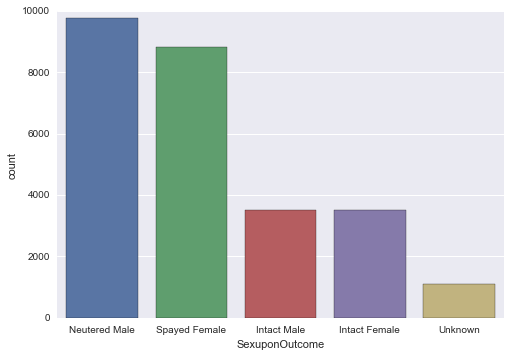

In [8]:
sns.countplot(df_train.SexuponOutcome)

<h3>Breed</h3></br><h4>Categorize breed as mix or not</h4>

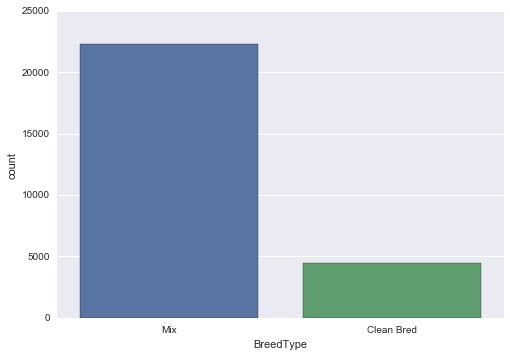

In [9]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return "Mix"
    return 'Clean Bred'
df_train['BreedType'] = df_train.Breed.apply(get_mix)

sns.countplot(df_train.BreedType)

<h3>Color</h3></br><h4>Check values and come up with a good way to categorize color</h4>

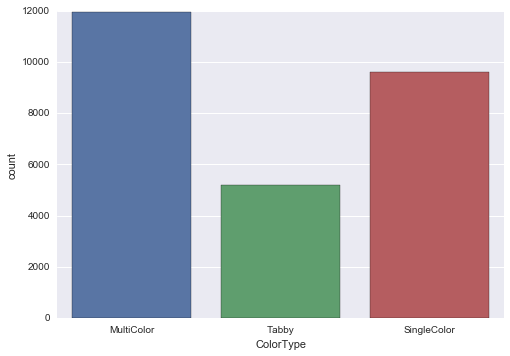

In [10]:
def get_colorType(x):
    x = str(x)
    if x.find('Tabby') >= 0: return "Tabby"
    if x.find('/') >= 0: return "MultiColor"  
    return 'SingleColor'
df_train['ColorType'] = df_train.Color.apply(get_colorType)

sns.countplot(df_train.ColorType)

<h3>Has Name</h3>

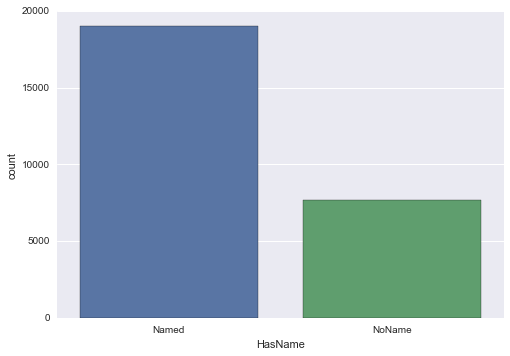

In [11]:
def has_name(x):
    if x != x : return "NoName"
    return 'Named'

df_train['HasName'] = df_train.Name.apply(has_name)

sns.countplot(df_train.HasName)

<h2>Figuring out if any of these parameters have a significant effect on the outcome</h2>

<h3>Animal Type</h3>

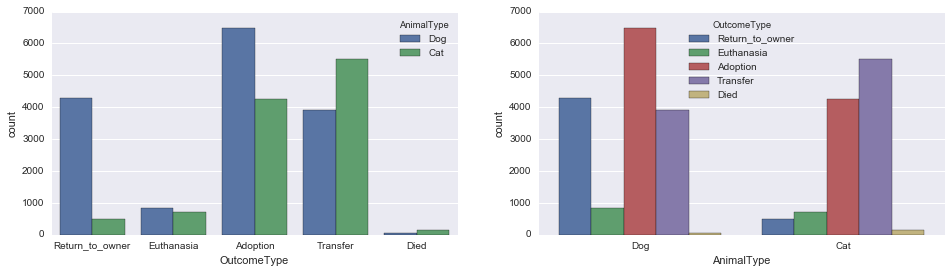

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=df_train, x='AnimalType',hue='OutcomeType', ax=ax2)

It can be seen that dogs have a higher chance in return_to_owner and adoption where as cats have a better chance in transfer.

<h3>Age</h3>

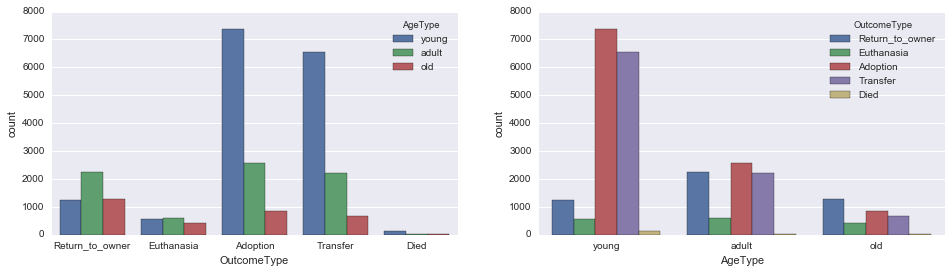

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='AgeType', ax=ax1)
sns.countplot(data=df_train, x='AgeType',hue='OutcomeType', ax=ax2)

It can be seen that young animals have a better chance in adoption or transfer, where as for older anials the outcome is distributed more evenly, death rate is very low in general

<h3>Sexupon Outcome</h3>    

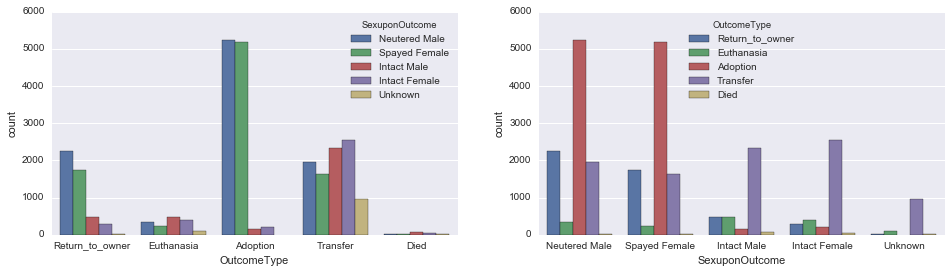

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='SexuponOutcome', ax=ax1)
sns.countplot(data=df_train, x='SexuponOutcome',hue='OutcomeType', ax=ax2)

It can be seen that for neutered/spayed animals adoption is a much greater chance and intact animals get transfered more often

<h3>Breed</h3>

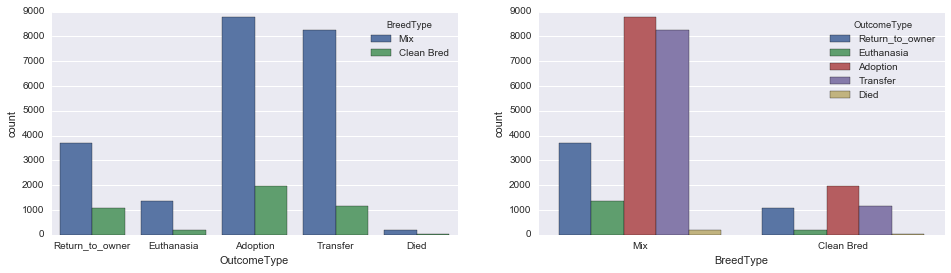

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='BreedType', ax=ax1)
sns.countplot(data=df_train, x='BreedType',hue='OutcomeType', ax=ax2)

The classification for breeds might not be very good, but the outcome is less predictable for clean bred animals compared to mixed ones.

<h3>Color</h3>

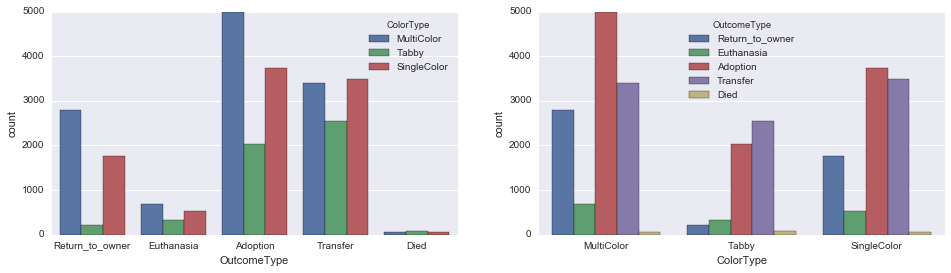

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='ColorType', ax=ax1)
sns.countplot(data=df_train, x='ColorType',hue='OutcomeType', ax=ax2)

Color, in the way I have categorized it doesn't say much as well

<h3>Has Name</h3>

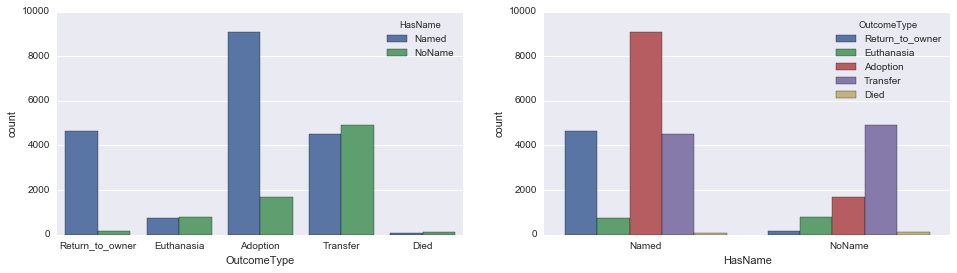

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='HasName', ax=ax1)
sns.countplot(data=df_train, x='HasName',hue='OutcomeType', ax=ax2)

It's no surprize that the majority of animals who return to their owner are named. But the majority of the named animals get adopted and most adopted animals have names.

<h2>Choosing features and representing them numerically</h2>

A feature matrix:

<strong>animal type</strong> - representing it as
<br>1 - cat
<br>2 - dog

<strong>age</strong> - representing it as the day values calculated above

<strong>sex</strong> - representing it as
<br>0 - unknown
<br>1 - neutered/spayed
<br>2 - intact

<strong>hasName</strong> - representing it as
<br>0 - no
<br>1 - yes

And the <strong>output</strong> (i.e. Y matrix) as
<br>1 - return to owner
<br>2 - euthanasia
<br>3 - adoption
<br>4 - transfer
<br>5 - died

In [18]:
def get_numeric_animal_type(x):
    x = str(x)
    if x.find('Dog') >= 0: return 2
    return 1
df_train['numeric_animal_type'] = df_train.AnimalType.apply(get_numeric_animal_type)

def get_numeric_sex_type(x):
    x = str(x)
    if x.find('Neutered') >= 0: return 1
    if x.find('Spayed') >= 0: return 1
    if x.find('Intact') >= 0: return 2
    return 0
df_train['numeric_sex_type'] = df_train.SexuponOutcome.apply(get_numeric_sex_type)

def get_numeric_hasName(x):
    x = str(x)
    if x.find('Named') >= 0: return 1
    return 0
df_train['numeric_hasName'] = df_train.HasName.apply(get_numeric_hasName)

def get_numeric_outcome(x):
    x = str(x)
    if x.find('Return_to_owner') >= 0: return 1
    if x.find('Euthanasia') >= 0: return 2
    if x.find('Adoption') >= 0: return 3
    if x.find('Transfer') >= 0: return 4
    if x.find('Died') >= 0: return 5
    return 0
df_train['numeric_outcome'] = df_train.OutcomeType.apply(get_numeric_outcome)

<h3>Select a test set from within, as the data is not sorted I don't need to shuffle it</h3>

In [19]:
df_train.shape

(26729, 19)

In [20]:
df_test = df_train[20000:]
df_train_set = df_train[:20000]

In [21]:
A = np.hstack([
        np.matrix(df_train_set.numeric_animal_type).T, 
        np.matrix(df_train_set.Age).T, 
        np.matrix(df_train_set.numeric_sex_type).T, 
        np.matrix(df_train_set.numeric_hasName).T])

Y = np.matrix(df_train_set.numeric_outcome).T

print (A[:5])
print (Y[:5])

[[  2 365   1   1]
 [  1 365   1   1]
 [  2 730   1   1]
 [  1  21   2   0]
 [  2 730   1   0]]
[[1]
 [2]
 [3]
 [4]
 [4]]


In [22]:
A_test = np.hstack([
        np.matrix(df_test.numeric_animal_type).T, 
        np.matrix(df_test.Age).T, 
        np.matrix(df_test.numeric_sex_type).T, 
        np.matrix(df_test.numeric_hasName).T])

Y_test = np.matrix(df_test.numeric_outcome).T

print (A_test[:5])
print (Y_test[:5])

[[   2  365    1    0]
 [   2 1095    1    1]
 [   1   21    2    0]
 [   2 5110    2    1]
 [   2  730    2    1]]
[[3]
 [3]
 [4]
 [2]
 [4]]


<h3>K - Nearest Neighbor</h3>

In [23]:


def K_NN(k, A, y, x):
    K = k
    heap = []
    N = A.shape[0]
    
    dummy_tupple = tup(np.inf, -1) #with value infinity and at index -1
    
    for i in range(K):
        hp.heappush(heap, dummy_tupple)
        
    for j in range(N):
        e = A[j,:]- x
        e = e.reshape((4,1))
        tp = tup(float(e.T*e), j)
        if tp <= heap[0]:
            hp.heapreplace(heap, tp)
    
    count_one = 0
    count_two = 0
    count_three = 0
    count_four = 0
    count_five = 0
    for m in range(K):
        h = hp.heappop(heap)
        if(y[h.idx] == 1.0):
            count_one = count_one + 1
        if(y[h.idx] == 2.0):
            count_two = count_two + 1
        if(y[h.idx] == 3.0):
            count_three = count_three + 1
        if(y[h.idx] == 4.0):
            count_four = count_four + 1
        if(y[h.idx] == 5.0):
            count_five = count_five + 1
            
    mostSeen = (max(count_one,count_two,count_three,count_four,count_five))
    if(mostSeen == count_one): 
        return 1
    if(mostSeen == count_two): 
        return 2
    if(mostSeen == count_three): 
        return 3
    if(mostSeen == count_four): 
        return 4
    if(mostSeen == count_five): 
        return 5

In [175]:
correct = 0
false = 0
for a in range (Y_test.size):
    actual = Y_test[a]
    x = A_test[a]
    prediction = K_NN(100, A, Y, x)
    
    if(prediction == actual):
        correct = correct + 1
    else :
        false = false + 1
 
print ("correct: ", correct)
print ("false: " , false)
print ("accuracy: ",  correct/(false+correct))


correct:  4222
false:  2507
accuracy:  0.6274334968048744


We have achieved a very low accuracy with this approach, one possible reason for this is that we have not used the breed feature of animals as this actually caries a lot distributed data. As we have simplified our data a lot, the neuances are lost

Let's see what would have happened if we had just assumed that cats get transfered and dogs get adopted

In [51]:
correct = 0
false = 0

for a in range (Y_test.size):
    actual = Y_test[a]
    x = A_test[a]
    if(x.item((0, 0)) == 1):
        prediction = 4
    else :
        prediction = 3
    
    if(prediction == actual):
        correct = correct + 1
    else :
        false = false + 1
 
print ("correct: ", correct)
print ("false: " , false)
print ("accuracy: ",  correct/(false+correct))

correct:  3052
false:  3677
accuracy:  0.45355922128102244


It's at least good to see we are just a little bit ahead of this almost blind guess

In [76]:
from itertools import product 

df_animals = pd.DataFrame(df_train_set.numeric_animal_type)

df_animals["numeric_sex_type"] = df_train_set.numeric_sex_type
df_animals["numeric_hasName"]  = df_train_set.numeric_hasName
df_animals["Age"]  = df_train_set.Age

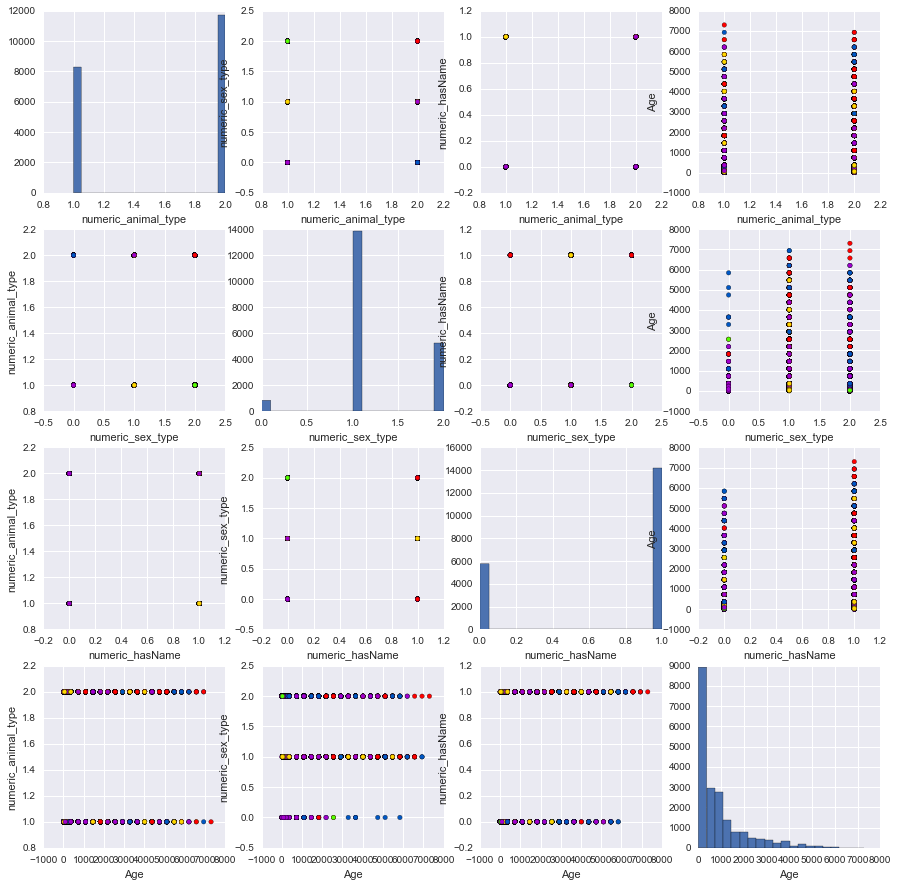

In [78]:
keys = ['numeric_animal_type','numeric_sex_type','numeric_hasName','Age']

i = 0
N = len(keys)

plt.figure(figsize=(15,15))

for v,w in product(keys, keys):
    i+=1
    plt.subplot(N,N,i)
    if v == w:
        plt.hist(df_animals[v],bins=20)
        plt.xlabel(v)
    else:
        plt.scatter(df_animals[v],df_animals[w],c=df_train_set['numeric_outcome'],cmap='prism')
        plt.xlabel(v)
        plt.ylabel(w)
        
plt.show()

Looking at the plots above we can see
<br>
  <br>- dogs that are steril have a distinguishable outcome
  <br>- cats without a name have a distinguishable outcome
  <br>- steril animals that have a name have a distinguishable outcome

A k-means clustering approach to see how it performs in comparison to K-NN:

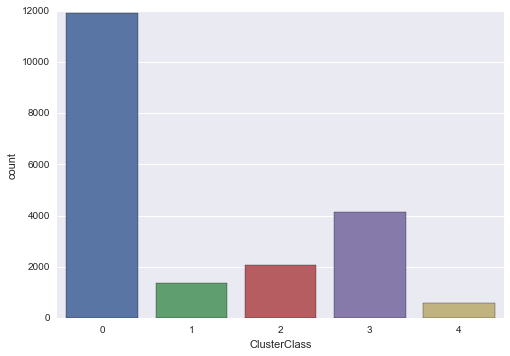

In [110]:
from sklearn.cluster import KMeans

kMeans = KMeans(n_clusters = 5)

kMeans.fit(df_animals)

classified_data = kMeans.labels_

df_processed = df_animals.copy()
df_processed["ClusterClass"] = pd.Series(classified_data, index=df_processed.index)

df_clusters = pd.DataFrame(df_processed.ClusterClass)
df_clusters["Outcome"] = df_train_set.OutcomeType

sns.countplot(df_clusters.ClusterClass)

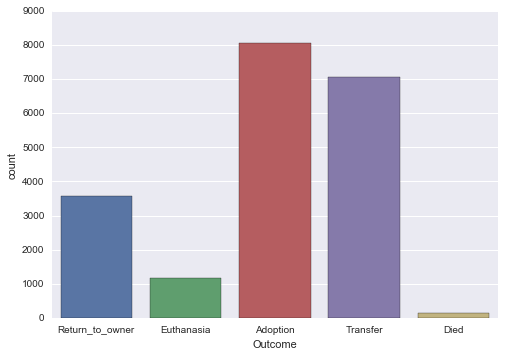

In [111]:
sns.countplot(df_clusters.Outcome)